In [11]:
import numpy as np

def read_npy_file(file_path):
    """
    读取.npy文件
    
    参数：
    file_path (str): .npy文件的路径
    
    返回：
    numpy数组: 从.npy文件中读取的数据
    """
    try:
        data = np.load(file_path,allow_pickle=True)
        return data
    except FileNotFoundError:
        print("文件未找到，请检查文件路径是否正确。")
    except Exception as e:
        print(f"读取.npy文件时发生错误：{e}")

if __name__ == "__main__":
    # 设置.npy文件的路径
    file_path = "/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Masks/1_0.npy"
    
    # 调用函数读取.npy文件
    points = read_npy_file(file_path)
    
    # 打印读取的结果
    if points is not None:
        print("成功读取.npy文件，数据为：")
        print(points)
        print(points["inst_map"])
        # print(points[0])


成功读取.npy文件，数据为：
{'inst_map': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'type_map': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)}


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/tmp/ipykernel_63721/584832904.py:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
/tmp/ipykernel_63721/584832904.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)


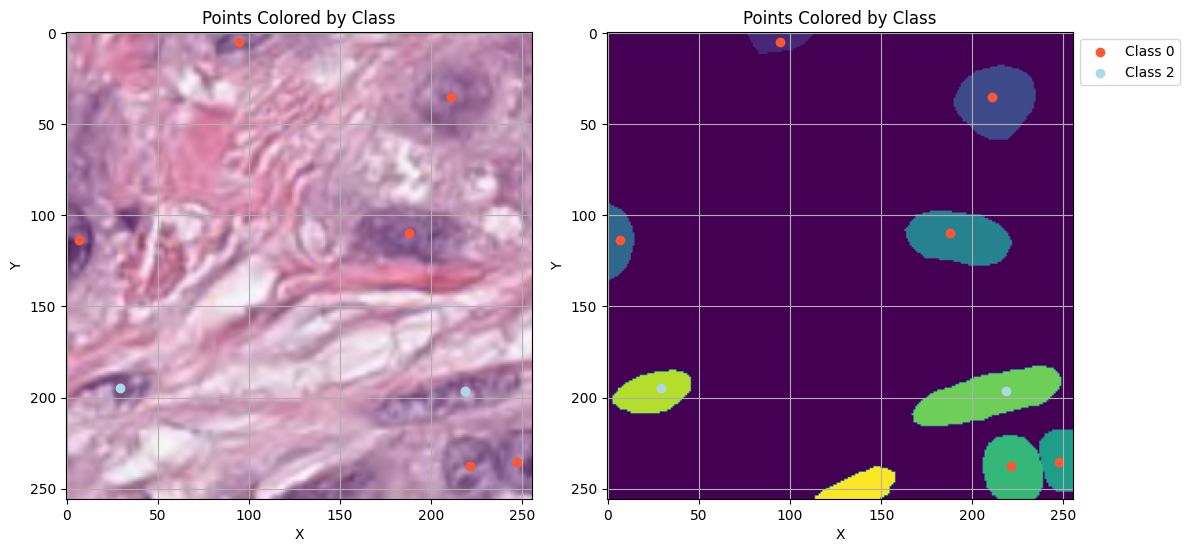

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image

# 生成固定的数字-颜色映射
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
colors = ['#FF5733', '#FFA500', '#ADD8E6', '#800080', '#FFFFFF']

cmap = ListedColormap(colors)

# 读取npy文件
data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/prompts/pannuke123/2_0.npy")
mask_data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Masks/2_0.npy", allow_pickle=True).item()  # 加载npy文件并将字典转换为Python对象

# 获取mask数据
mask = mask_data['inst_map']
print(mask_data["type_map"])

# 提取坐标和类别信息
points = data[:, :2]
labels = data[:, 2]

# 打开PNG图像
image_path = "/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Images/2_0.png"
image = Image.open(image_path)


# 创建绘图对象和子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个子图中绘制原始图像和点
axes[0].imshow(image)
for label in np.unique(labels):
    idx = labels == label
    axes[0].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Points Colored by Class")
axes[0].grid(True)

# 在第二个子图中绘制mask和点
axes[1].imshow(mask, cmap='viridis')
for label in np.unique(labels):
    idx = labels == label
    axes[1].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_title("Points Colored by Class")
axes[1].grid(True)
# 在每个子图的外部显示图例
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
# 调整布局
plt.tight_layout()

# 保存结果图像
plt.savefig("result_combined.png")
plt.show()

In [29]:
# 读取txt文件并将内容存储在列表中
with open("/data/hotaru/my_projects/PromptNucSeg/prompter/pannuke213.txt", "r") as file:
    lines = file.readlines()

# 创建一个列表来存储处理后的行
processed_lines = []

# 设置一个变量来存储当前 epoch 的编号
current_epoch = None

# 迭代txt文件的每一行
for line in lines:
    # 检查当前行是否匹配到 epoch 的格式
    if "Epoch: [" in line and '[  0/158]' in line:
        # 提取当前 epoch 的编号
        processed_lines.append(line)

    if "Epoch: [" in line and '[157/158]' in line:
        processed_lines.append(line)

    if "Epoch=" in line and '(0 / 2656 Steps)' in line:
        processed_lines.append(line)

    if "Epoch=" in line and '(2655 / 2656 Steps)' in line:
        processed_lines.append(line)
    
    if "Epoch=" not in line and "Epoch: [" not in line:
        processed_lines.append(line)


# 将处理后的行写入新的txt文件
with open("processed_file.txt", "w") as outfile:
    for line in processed_lines:
        outfile.write(line)


points: [[  8.57169342  10.88175678]
 [147.04167175   5.9579978 ]
 [247.3497467   18.92010689]
 [ 13.97204876  29.10460281]
 [187.90394592  52.95252609]
 [  7.34541273  66.61329651]
 [215.38955688  70.2967453 ]
 [ 54.84651184  92.75977325]
 [157.33486938  96.59029388]
 [ 15.4804306  106.39242554]
 [200.47201538 105.5065155 ]
 [249.13352966 109.96367645]
 [ 84.61394501 123.02185822]
 [225.62283325 128.25335693]
 [ 16.91996765 162.11961365]
 [224.38101196 185.41381836]
 [156.35031128 189.81326294]
 [ 13.97776604 201.84963989]
 [252.91424561 209.79695129]
 [ 92.55796051 235.12406921]
 [176.69367981 241.61929321]
 [253.63162231 234.66705322]
 [151.49693298 253.32325745]]


/tmp/ipykernel_63721/1352783697.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
/tmp/ipykernel_63721/1352783697.py:49: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)


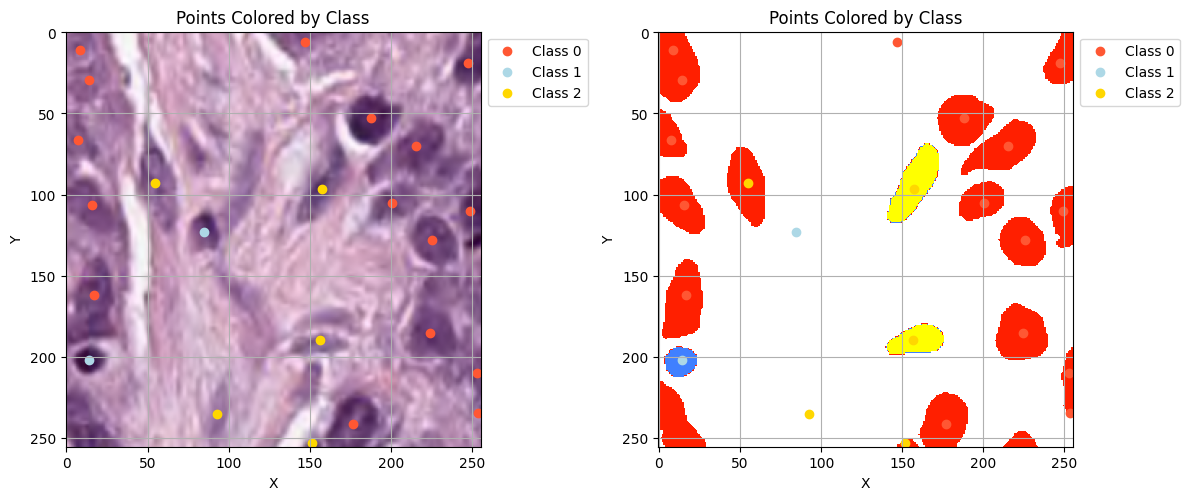

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image

# 生成固定的数字-颜色映射
colors = ['#FF5733',  '#ADD8E6', '#FFD700','#800080', '#FFFFFF',]
colors_mask = ['#FFFFFF', '#FF1F00',  '#4080FF', '#FFFF00','#2D0040', '#999999']


 # 用于绘制 mask 图，颜色保持一致

cmap = ListedColormap(colors)
cmap_mask = ListedColormap(colors_mask)
file_name ="3_100"
# 读取npy文件
data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/prompts/pannuke213_70?/"+file_name+".npy")
mask_data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Masks/"+file_name+".npy", allow_pickle=True).item()  # 加载npy文件并将字典转换为Python对象

# 获取mask数据和type_map
mask = mask_data['inst_map']
type_map = mask_data['type_map']

# 提取坐标和类别信息
points = data[:, :2]
labels = data[:, 2]
print("points:",points)
# 打开PNG图像
image_path = "/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Images/"+file_name+".png"
image = Image.open(image_path)

# 创建绘图对象和子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 在第一个子图中绘制原始图像和点
axes[0].imshow(image)
for label in np.unique(labels):
    idx = labels == label
    axes[0].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Points Colored by Class")
axes[0].grid(True)

# 在第二个子图中绘制mask和点
axes[1].imshow(type_map, cmap=cmap_mask, vmin=0, vmax=len(colors_mask)-1)
for label in np.unique(labels):
    idx = labels == label
    axes[1].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_title("Points Colored by Class")
axes[1].grid(True)

# 在每个子图的外部显示图例
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
# colorbar = plt.colorbar(axes[1].imshow(type_map, cmap=cmap_mask, vmin=0, vmax=len(colors_mask)-1))


# 调整布局
plt.tight_layout()

# 保存结果图像
plt.savefig("result_combined.png")
plt.show()


# 错误统计

0
0
0
0
0
0
0
10
0
0
0
0
0


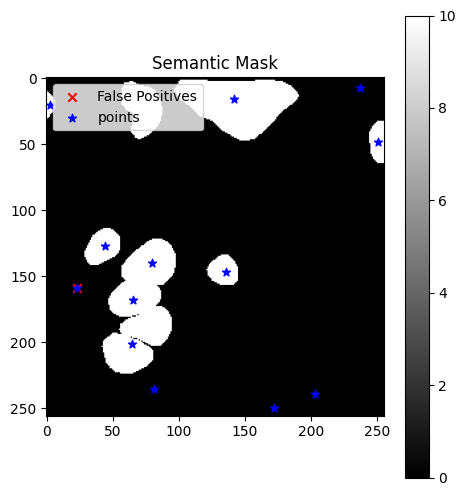

1. Mask上的实例数目: 10
2. Points数目: 13
3. 多检Points数目: 1
5. 类别错误Points数目: 1
**********


/tmp/ipykernel_108404/1666116180.py:96: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
/tmp/ipykernel_108404/1666116180.py:106: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)


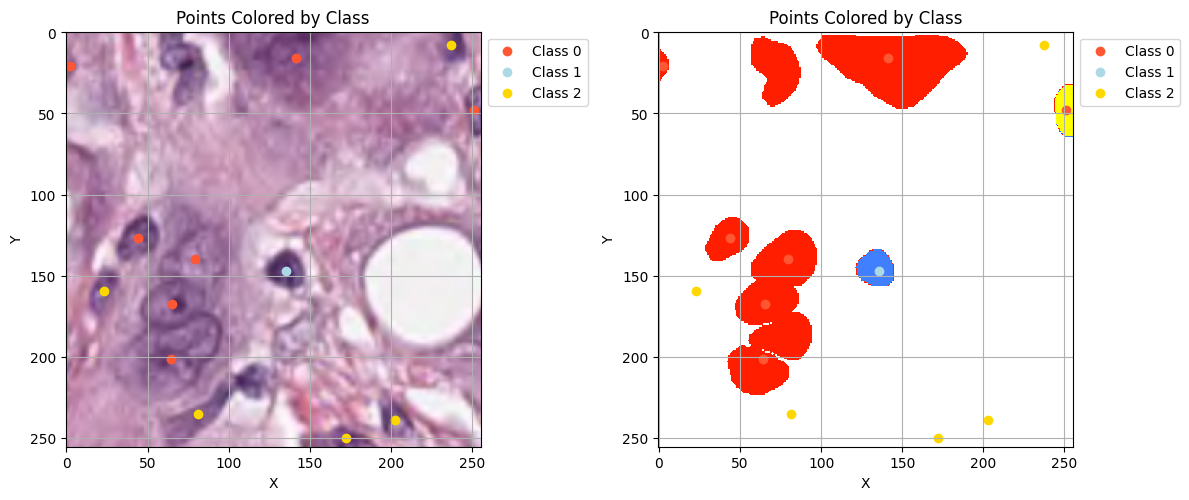

(13, 2)


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image

# 生成固定的数字-颜色映射
colors = ['#FF5733',  '#ADD8E6', '#FFD700','#800080', '#FFFFFF',]
colors_mask = ['#FFFFFF', '#FF1F00',  '#4080FF', '#FFFF00','#2D0040', '#999999']
 # 用于绘制 mask 图，颜色保持一致
cmap = ListedColormap(colors)
cmap_mask = ListedColormap(colors_mask)

file_name ="1_1"
# 读取npy文件
point_data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/prompts/pannuke321/"+file_name+".npy")
mask_data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Masks/"+file_name+".npy", allow_pickle=True).item()  # 加载npy文件并将字典转换为Python对象

# 获取mask数据和type_map
mask = mask_data['inst_map']
type_map = mask_data['type_map']
# 提取坐标和类别信息
points = point_data[:, :2]
points_labels = point_data[:, 2]

# 1. 统计mask上的实例数目
num_instances = len(np.unique(mask)) - 1  # 减去背景标签
# 2. 统计points数目
num_points = len(points)

semantic_mask = np.where(type_map > 0, 10, 0)
# 计算多检points数目
false_positives = 0
false_positives_coords = []  # 用于保存多检点的坐标
for point in points:
    x, y = int(point[0]), int(point[1])
    print(semantic_mask[x, y])
    if semantic_mask[x, y] == 10: 
        false_positives_coords.append((x, y))
        false_positives += 1


# 可视化语义mask图以及多检的点
plt.figure(figsize=(12, 6))

# 绘制语义mask图
plt.subplot(1, 2, 1)
plt.imshow(semantic_mask, cmap='gray')
plt.title('Semantic Mask')
plt.colorbar()
plt.axis('on')

# 标记多检的点
if false_positives_coords:
    false_positives_coords = np.array(false_positives_coords)
    plt.scatter(false_positives_coords[:, 0], false_positives_coords[:, 1], c='r', marker='x', label='False Positives')
    plt.scatter(points[:, 0], points[:, 1], c='b', marker='*', label='points')

plt.legend()
plt.show()



# # 4. 计算漏检points数目
# false_negatives = 0
# for instance_label in np.unique(mask):
#     if instance_label == 0:  # 跳过背景标签
#         continue
#     if np.sum(np.logical_and(mask == instance_label, points_labels == 1)) == 0:  # 如果mask所标记的inst内没有point
#         false_negatives += 1

# 5. 计算类别错误points数目
misclassified_points = 0
for point, label in zip(points, points_labels):
    x, y = int(point[0]), int(point[1])
    instance_label = mask[x, y]
    if instance_label != 0:  # 不考虑背景
        if instance_label != type_map[x, y]:  # 如果与typemap对应不上
            misclassified_points += 1

print("1. Mask上的实例数目:", num_instances)
print("2. Points数目:", num_points)
print("3. 多检Points数目:", false_positives)
# print("4. 漏检Points数目:", false_negatives)
print("5. 类别错误Points数目:", misclassified_points)

# 打开PNG图像
image_path = "/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Images/"+file_name+".png"
image = Image.open(image_path)
# 创建绘图对象和子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 在第一个子图中绘制原始图像和点
print("*"*10)
axes[0].imshow(image)
for label in np.unique(points_labels):
    idx = points_labels == label
    axes[0].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Points Colored by Class")
axes[0].grid(True)

# 在第二个子图中绘制mask和点
axes[1].imshow(type_map, cmap=cmap_mask, vmin=0, vmax=len(colors_mask)-1)
for label in np.unique(points_labels):
    idx = points_labels == label
    axes[1].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
# for label in np.unique(points_labels):
#     idx = points_labels == label
#     integer_points = points[idx].astype(int)  # 将浮点数坐标转换为整数坐标
#     print(integer_points[:, 0], integer_points[:, 1])
#     axes[1].scatter(integer_points[:, 0], integer_points[:, 1], label=f"Class {int(label)}", c='k')  # 将颜色设置为黑色
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_title("Points Colored by Class")
axes[1].grid(True)

# 在每个子图的外部显示图例
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
# colorbar = plt.colorbar(axes[1].imshow(type_map, cmap=cmap_mask, vmin=0, vmax=len(colors_mask)-1))
# 调整布局
plt.tight_layout()
plt.show()

print(points.shape)


## 还原错误统计 image-class


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
from scipy.io import loadmat
import cv2

# 生成固定的数字-颜色映射
colors = ['#FF5733',  '#ADD8E6', '#FFD700','#800080', '#FFFFFF',]
colors_mask = ['#FFFFFF', '#FF1F00',  '#4080FF', '#FFFF00','#2D0040', '#999999']
 # 用于绘制 mask 图，颜色保持一致
cmap = ListedColormap(colors)
cmap_mask = ListedColormap(colors_mask)

def load_dataset(dataset,file_name):
    if dataset == 'pannuke':
        point_data = np.load("/data/hotaru/my_projects/PNS_tmp/segmentor/prompts/pannuke321/"+file_name+".npy")
        mask_data = np.load("/data/hotaru/my_projects/PNS_tmp/segmentor/datasets/pannuke/Masks/"+file_name+".npy", allow_pickle=True).item()  # 加载npy文件并将字典转换为Python对象
        inst_map = mask_data['inst_map']
        type_map = mask_data['type_map']
    elif dataset == 'cpm17':
        point_data = np.load("/data/hotaru/my_projects/PNS_tmp/segmentor/prompts/cpm17/"+file_name+".npy")
        mask_data = loadmat("/data/hotaru/my_projects/PNS_tmp/segmentor/datasets/cpm17/test/Labels/"+file_name+".mat")  # 加载npy文件并将字典转换为Python对象
        inst_map = mask_data['inst_map']
        type_map = np.ones_like(inst_map)
    else:
        print("暂不支持其他数据集")
        return
    # 提取坐标和类别信息
    points = point_data[:, :2]
    points_labels = point_data[:, 2]
    return inst_map,type_map,points,points_labels

In [ ]:
def count_false_points(inst_map,type_map,points,points_labels):
    #初始化所需变量
    temp_inst_map = inst_map.copy()
    _ , binary_semantic_map = cv2.connectedComponents(inst_map,connectivity='4')
    point_is_correct = False # flag

    num_gt_instances = 0 # 0. gt总数
    num_points = 0       # 1. points总数
    true_counts = 0      # 2. 正确总数
    m_back_count = 0     # 3. 背景多检
    m_front_count = 0    # 4. 前景多检
    l_single_count = 0   # 5. 单独漏检
    l_multi_count = 0    # 6. 粘连漏检
    cls_false_count = 0  # 7. 类别错误
    all_false_num = 0    # 8. 错误总数

    '''
        开始计算
        * 2. 正确总数：前景非零&非-1&类别正确/没有类别,更新temp_inst_map&semantic_binary_map
        * 4. 前景多检：temp_inst_map = -1
        * 5. 单独漏检：剩余语义图连通图数目
        * 6. 粘连漏检：剩余实例图数目 - 剩余语义图数目
        * 7. 类别错误：前景非零&非-1&类别错误,更新temp_inst_map&semantic_binary_map
    '''

    num_gt_instances = len(np.unique(mask)) - 1  # 0. 减去背景标签
    num_points = len(points)                     # 1.

    if temp_inst_map[x, y] != 0 and  temp_inst_map[x, y] != -1: # 前景 2./7.
        if type_map == 0 or label == type_map[x, y]-1:  # 2.
            true_counts += 1
            point_is_correct = True        
            # 删掉已经定位的inst
            liantong_num, liantong_map = cv2.connectedComponents(binary_semantic_map) 
            temp_inst_id = temp_inst_map[x, y]  
            temp_liantong_id = liantong_map[x,y]
            for i in range(temp_inst_map.shape[0]):  
                for j in range(temp_inst_map.shape[1]):  
                    if temp_inst_map[i, j] == temp_inst_id:  
                        temp_inst_map[i, j] = -1  
                    if liantong_map[i,j] == temp_liantong_id:
                        binary_semantic_map[i, j] = 0
        else: # 7.
            cls_false_count += 1
            # 删掉已经定位的inst
            liantong_num, liantong_map = cv2.connectedComponents(binary_semantic_map) 
            temp_inst_id = temp_inst_map[x, y]  
            temp_liantong_id = liantong_map[x,y]
            for i in range(temp_inst_map.shape[0]):  
                for j in range(temp_inst_map.shape[1]):  
                    if temp_inst_map[i, j] == temp_inst_id:  
                        temp_inst_map[i, j] = -1  
                    if liantong_map[i,j] == temp_liantong_id:
                        binary_semantic_map[i, j] = 0
    
    if point_is_correct == False and temp_inst_map[x, y] == 0:   #3.
        m_back_count += 1
    
    if point_is_correct == False and temp_inst_map[x, y] == -1:   #4.
        

        










    all_false_num = m_back_count + m_front_count + l_single_count + l_multi_count + cls_false_count

    return num_gt_instances,num_points,true_counts,m_back_count,m_front_count,l_single_count,l_multi_count,cls_false_count,all_false_num

    

In [ ]:

file_name ="1_1"
# 读取npy文件
point_data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/prompts/pannuke321/"+file_name+".npy")
mask_data = np.load("/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Masks/"+file_name+".npy", allow_pickle=True).item()  # 加载npy文件并将字典转换为Python对象

# 获取mask数据和type_map
mask = mask_data['inst_map']
type_map = mask_data['type_map']
# 提取坐标和类别信息
points = point_data[:, :2]
points_labels = point_data[:, 2]

# 1. 统计mask上的实例数目
num_instances = len(np.unique(mask)) - 1  # 减去背景标签
# 2. 统计points数目
num_points = len(points)

semantic_mask = np.where(type_map > 0, 10, 0)
# 计算多检points数目
false_positives = 0
false_positives_coords = []  # 用于保存多检点的坐标
for point in points:
    x, y = int(point[0]), int(point[1])
    print(semantic_mask[x, y])
    if semantic_mask[x, y] == 10: 
        false_positives_coords.append((x, y))
        false_positives += 1


# 可视化语义mask图以及多检的点
plt.figure(figsize=(12, 6))

# 绘制语义mask图
plt.subplot(1, 2, 1)
plt.imshow(semantic_mask, cmap='gray')
plt.title('Semantic Mask')
plt.colorbar()
plt.axis('on')

# 标记多检的点
if false_positives_coords:
    false_positives_coords = np.array(false_positives_coords)
    plt.scatter(false_positives_coords[:, 0], false_positives_coords[:, 1], c='r', marker='x', label='False Positives')
    plt.scatter(points[:, 0], points[:, 1], c='b', marker='*', label='points')

plt.legend()
plt.show()



# # 4. 计算漏检points数目
# false_negatives = 0
# for instance_label in np.unique(mask):
#     if instance_label == 0:  # 跳过背景标签
#         continue
#     if np.sum(np.logical_and(mask == instance_label, points_labels == 1)) == 0:  # 如果mask所标记的inst内没有point
#         false_negatives += 1

# 5. 计算类别错误points数目
misclassified_points = 0
for point, label in zip(points, points_labels):
    x, y = int(point[0]), int(point[1])
    instance_label = mask[x, y]
    if instance_label != 0:  # 不考虑背景
        if instance_label != type_map[x, y]:  # 如果与typemap对应不上
            misclassified_points += 1

print("1. Mask上的实例数目:", num_instances)
print("2. Points数目:", num_points)
print("3. 多检Points数目:", false_positives)
# print("4. 漏检Points数目:", false_negatives)
print("5. 类别错误Points数目:", misclassified_points)

# 打开PNG图像
image_path = "/data/hotaru/my_projects/PromptNucSeg/segmentor/datasets/pannuke/Images/"+file_name+".png"
image = Image.open(image_path)
# 创建绘图对象和子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 在第一个子图中绘制原始图像和点
print("*"*10)
axes[0].imshow(image)
for label in np.unique(points_labels):
    idx = points_labels == label
    axes[0].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Points Colored by Class")
axes[0].grid(True)

# 在第二个子图中绘制mask和点
axes[1].imshow(type_map, cmap=cmap_mask, vmin=0, vmax=len(colors_mask)-1)
for label in np.unique(points_labels):
    idx = points_labels == label
    axes[1].scatter(points[idx, 0], points[idx, 1], label=f"Class {int(label)}", c=[colors[int(label)]], cmap=cmap)
# for label in np.unique(points_labels):
#     idx = points_labels == label
#     integer_points = points[idx].astype(int)  # 将浮点数坐标转换为整数坐标
#     print(integer_points[:, 0], integer_points[:, 1])
#     axes[1].scatter(integer_points[:, 0], integer_points[:, 1], label=f"Class {int(label)}", c='k')  # 将颜色设置为黑色
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_title("Points Colored by Class")
axes[1].grid(True)

# 在每个子图的外部显示图例
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
# colorbar = plt.colorbar(axes[1].imshow(type_map, cmap=cmap_mask, vmin=0, vmax=len(colors_mask)-1))
# 调整布局
plt.tight_layout()
plt.show()

print(points.shape)
